In [1]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
import safeopt
import stageopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

## Define a kernel and function

Here we define a kernel. The function is drawn at random from the GP and is corrupted my Gaussian noise

In [2]:
# Measurement noise
noise_var = 0.05 ** 2

# Bounds on the inputs variable
bounds = [(-5., 5.), (-5., 5.)]

# Define Kernel
kernel = GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.0,
                      ARD=True)

# Initial safe point
x0 = np.zeros((1, len(bounds)))

# Generate function with safe initial point at x=0
def sample_safe_fun():
    while True:
        fun = safeopt.sample_gp_function(kernel, bounds, noise_var, 10)
        if fun([0,0], noise=False) > 0.5:
            break
    return fun

## Interactive run of the algorithm

The slow part of running this is the plotting with matplotlib. Consider switching to the 2D level sets.

In [3]:
# Define the objective function
fun = sample_safe_fun()

# The statistical model of our objective function
gp1 = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)
gp2 = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)

# The optimization routine
# opt = safeopt.SafeOptSwarm(gp, 0., bounds=bounds, threshold=0.2)
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100)
safe_opt = safeopt.SafeOpt(gp1, parameter_set, 0., lipschitz=None, threshold=0.2)
stage_opt = stageopt.StageOpt(gp2, parameter_set, 0., lipschitz=None, threshold=0.2, switch_time=8)

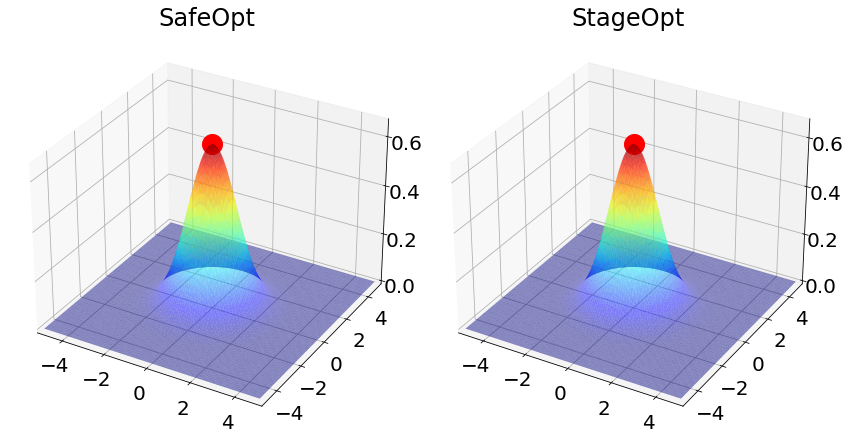

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # 导入 3D 绘图工具

def plot_gp():
    # 创建图形对象
    fig = plt.figure(figsize=(12, 12))

    # 创建第一个 3D 子图
    ax1 = fig.add_subplot(121, projection='3d')  # 211 表示 2 行 1 列，第 1 个子图
    safe_opt.plot(100, axis=ax1, plot_3d=True)  # 在第一个子图上绘制
    ax1.set_title("SafeOpt")

    # 创建第二个 3D 子图
    ax2 = fig.add_subplot(122, projection='3d')  # 212 表示 2 行 1 列，第 2 个子图
    stage_opt.plot(100, axis=ax2, plot_3d=True)  # 在第二个子图上绘制
    ax2.set_title("StageOpt")

    # 显示图形
    plt.tight_layout()
    plt.show()

plot_gp()

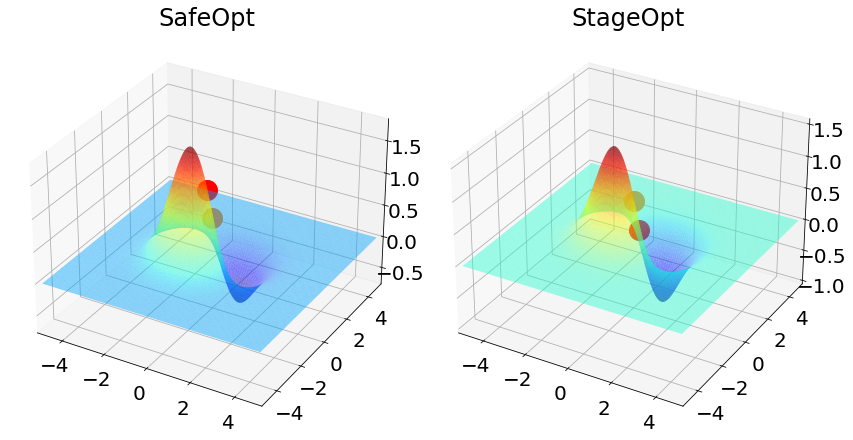

In [5]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

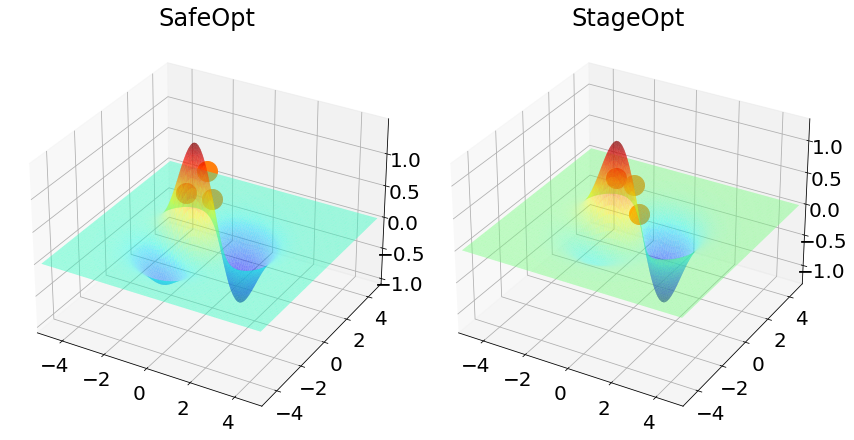

In [6]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

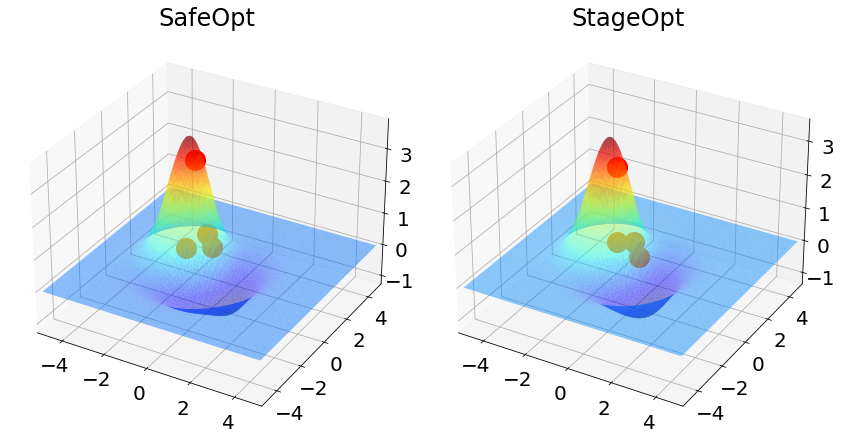

In [7]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

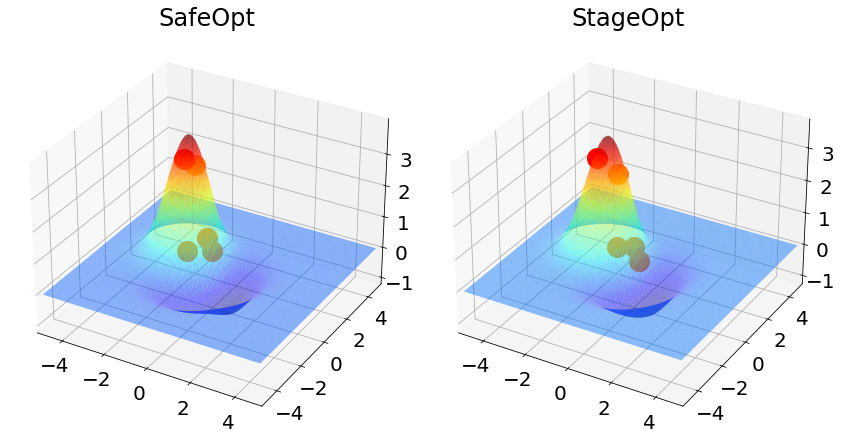

In [8]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

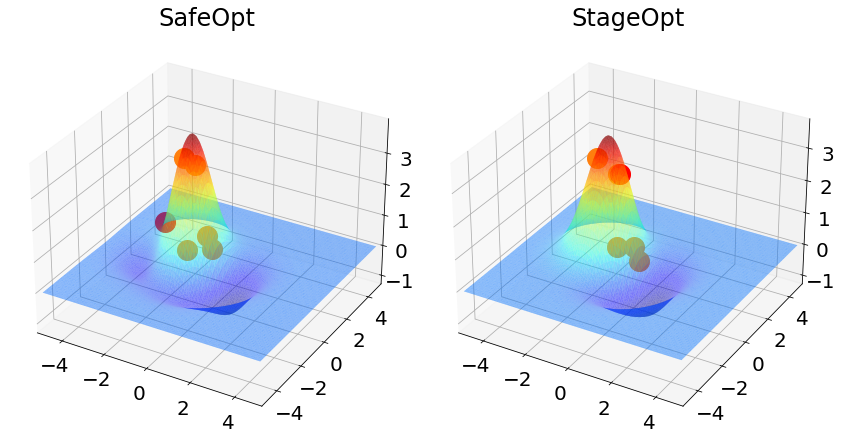

In [9]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

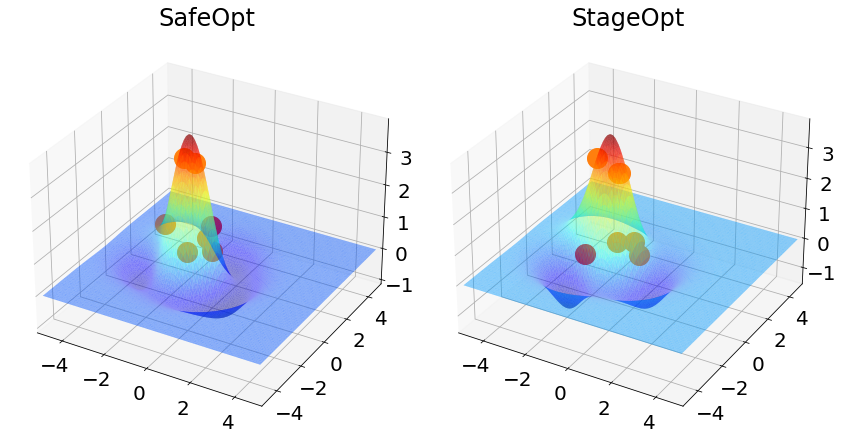

In [10]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

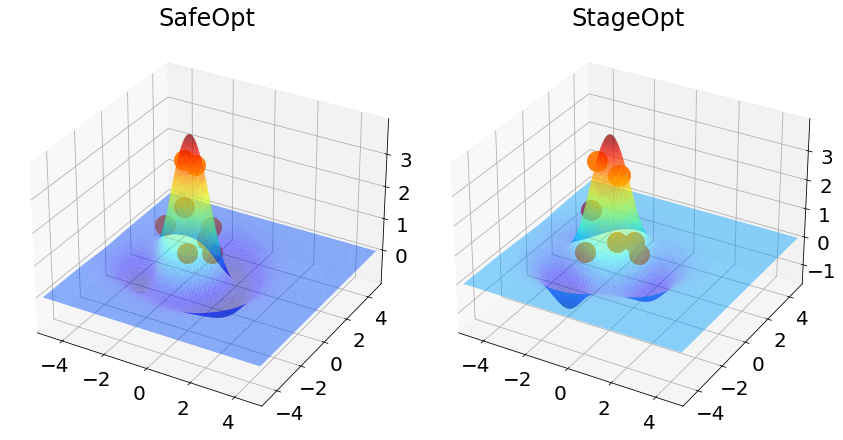

In [11]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

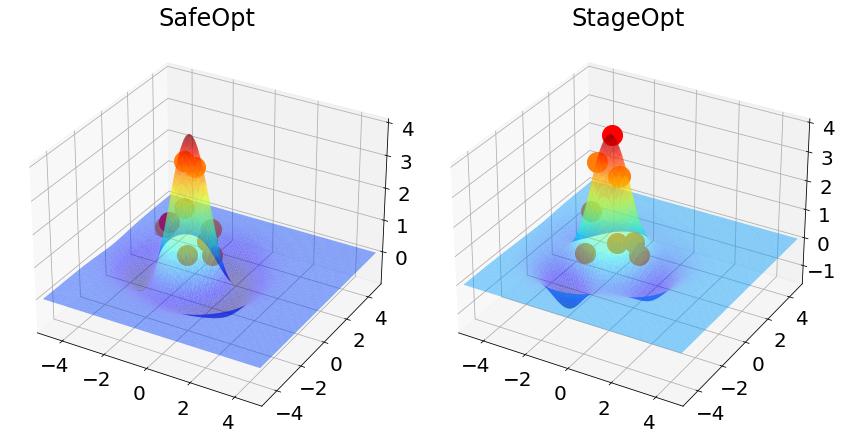

In [12]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

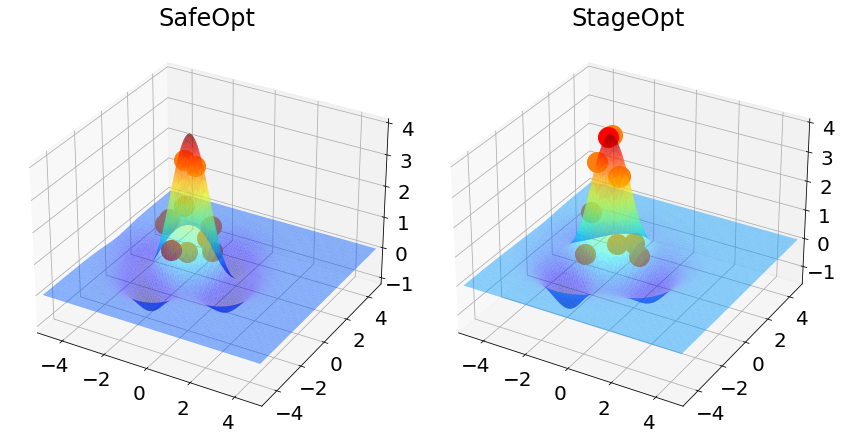

In [13]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

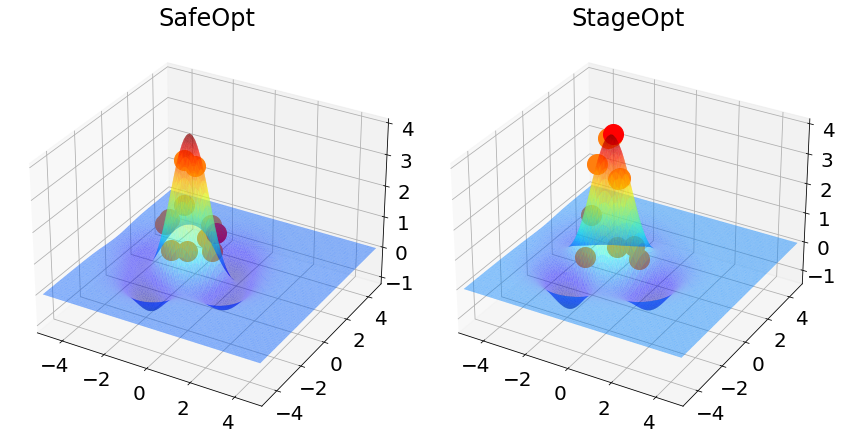

In [14]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()

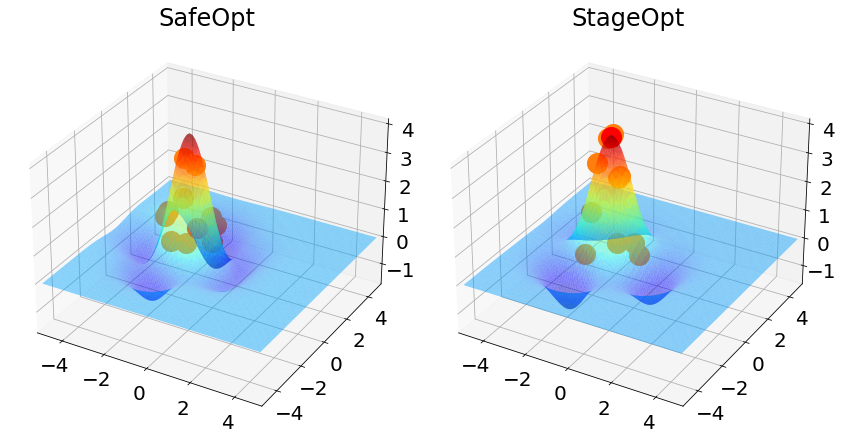

In [15]:
# Obtain next query point
x_next = safe_opt.optimize()
# Get a measurement from the real system
y_meas = fun(x_next)
# Add this to the GP model
safe_opt.add_new_data_point(x_next, y_meas)

x_next = stage_opt.optimize()[0]
y_meas = fun(x_next)
stage_opt.add_new_data_point(x_next, y_meas)

plot_gp()